The wavelet transform is the convolution of a function (data) with a wavelet base. The result of this convolution is the wavelet coefficients. Convolution measures the similarity between the wavelet function and the data. If the similarity is high then you will have peaks. But since wavelets vary from one scale to another, at certain scales it may or may not have the highest similarity. If at low scales there are peaks in the coefficients, then your data has high frequencies. On the other hand, if at high scales there are peaks then your data has a low frequency

In [1]:
import pywt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.signal import get_window
from numpy.fft import fft, fftfreq, ifft
from statsmodels.tsa.stattools import acf
from statsmodels.graphics import tsaplots
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.signal import find_peaks, peak_prominences

## load data

In [2]:
data = pd.read_excel('2021_09_20_LCB/2021_09_20_StationI_LCB.xlsx', skiprows=44)
data1 =  data.iloc[2500:8500] #2189:8500
data1.head(50)

,Unnamed: 0,Unnamed: 1,Time [h],Local time,Backscatter [a.u.],OD600 [-],Time [h].1,Growth rate [(a.u.)/h] - from backscatter,Time [h].2,Growth rate [[-]/h] - from OD600,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
2500,NaN,NaN,83.37611,2021-08-30 01:26:33,281.8084,4.861077,83.42612,0.004572,83.42612,0.002724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,NaN,NaN,83.40945,2021-08-30 01:28:33,281.8552,4.861558,83.45944,0.003806,83.45944,0.002267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,NaN,NaN,83.44278,2021-08-30 01:30:33,281.8995,4.862013,83.49278,0.002870,83.49278,0.001710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2503,NaN,NaN,83.47611,2021-08-30 01:32:33,281.9359,4.862387,83.52611,0.002271,83.52611,0.001354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2504,NaN,NaN,83.50945,2021-08-30 01:34:33,281.9619,4.862654,83.55945,0.002228,83.55945,0.001327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,NaN,NaN,83.54278,2021-08-30 01:36:33,281.9814,4.862855,83.59277,0.002457,83.59277,0.001463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,NaN,NaN,83.57611,2021-08-30 01:38:32,282.0017,4.863063,83.62611,0.002521,83.62611,0.001502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,NaN,NaN,83.60944,2021-08-30 01:40:32,282.0254,4.863307,83.65944,0.002211,83.65944,0.001317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2508,NaN,NaN,83.64278,2021-08-30 01:42:32,282.0502,4.863561,83.69278,0.001739,83.69278,0.001036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2509,NaN,NaN,83.67611,2021-08-30 01:44:32,282.0717,4.863782,83.72610,0.001548,83.72610,0.000923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## plot data

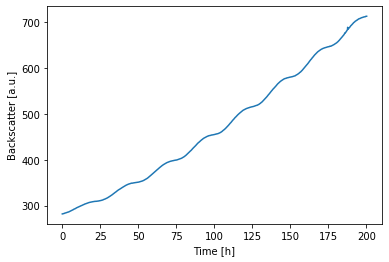

In [3]:
y = data1["Backscatter [a.u.]"]
x = (data1['Time [h]']) - (data1['Time [h]'].min()) 
plt.plot(x, y)
plt.ylabel("Backscatter [a.u.]")
plt.xlabel('Time [h]')
plt.show()

## remove the drift

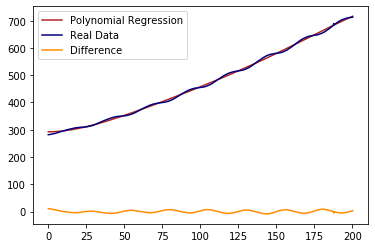

In [4]:
X = np.array(np.arange(len(x))).reshape(-1,1)
pf = PolynomialFeatures(5)#5
X = pf.fit_transform(X)
reg = LinearRegression().fit(X, y)

plt.plot(x, reg.predict(X),label='Polynomial Regression', color='firebrick')
plt.plot(x, y, label='Real Data', color='navy')
plt.plot(x, (reg.predict(X)-y), label='Difference', color='darkorange')
plt.legend()
plt.show()

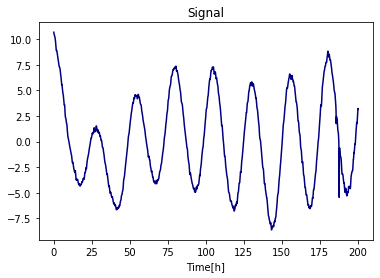

In [5]:
signal = reg.predict(X) - y
signal = signal-signal.mean()
plt.figure()
plt.plot(x, signal, label='signal',color='navy')
plt.title("Signal")
plt.xlabel("Time[h]")
plt.show()

## smoothen data by moving average

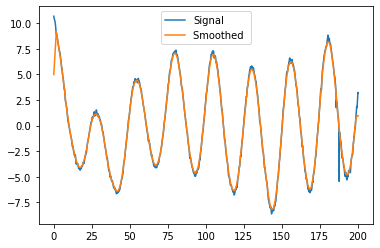

In [6]:
kernel_size = 100
kernel = np.ones(kernel_size) / kernel_size
Smoothed_signal = np.convolve(signal, kernel, mode='same')
plt.plot(x, signal)
plt.plot(x, Smoothed_signal)
plt.legend(['Signal', 'Smoothed '])
plt.show()

In [ ]:
# from scipy import signal
# import matplotlib

# t = x.values
# m = len(t)
# n = 6000
# w = np.fft.rfft(Smoothed_signal * get_window('hann', m), n=n)
# freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
# plt.plot(freqs, 20*np.log10(np.abs(w)))
# plt.xlim([0,0.2])
# plt.title("hann window")
# plt.xlabel("Frequency")
# plt.ylabel("Amplitude (dB)")

# fs = 0.008333333333333333
# n = 1000
# f, t, Zxx = signal.stft(Smoothed_signal, fs, nperseg=n, window=get_window('bartlett', n))
# plt.figure(figsize=(10,5))
# plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma')
# plt.colorbar()
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.ylim([0,0.00003])
# plt.show()

## Wavelet Transform

In [82]:

def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.get_cmap('Dark2'), title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1./frequencies
    
    num_lev = 128
    contourlevels = np.log2(np.linspace(224, 5000, num_lev + 1)) #224, 5000
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both', cmap='plasma')
    plt.rc('xtick', labelsize=19)
    plt.rc('ytick', labelsize=19)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    #ax.invert_yaxis()
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.savefig("Wavelet_Transform.png")
    
    return time, period, power


If we stretch the wavelet we make it sensetive to lower frequencies in the signal

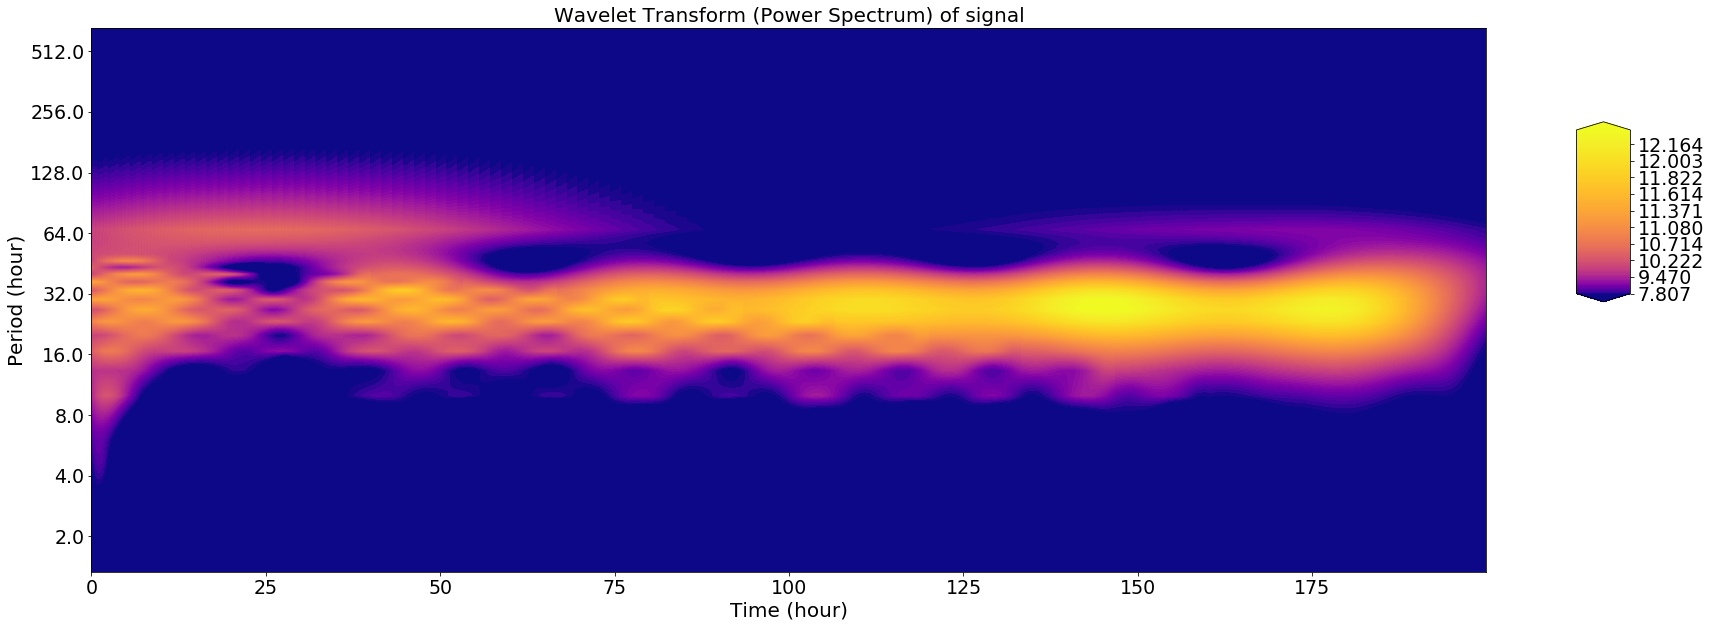

In [84]:
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (hour)'
xlabel = 'Time (hour)'
    
N = Smoothed_signal.shape[0]
t0 = 0
dt = (0.016666666666666666) # 1min = 1/60 h
time = np.arange(0, 2 * N, 2) * dt + t0
scales = [20, 25, 50, 60, 70, 80, 90,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 4000, 5000, 6000, 7000, 8000,
          9000, 10000]  

#scales = np.arange(1, 1000, 10)
fig, ax = plt.subplots(figsize=(25, 10))
time, period, power = plot_wavelet(ax, time, Smoothed_signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)


In [30]:
rolling_mean = []
power_array = np.array(power)
for i in range(power_array.shape[0]):
    df = pd.DataFrame(data=power_array[i,:]).rolling(window=1500)
    rolling_mean.extend((df.mean().dropna()).mean())


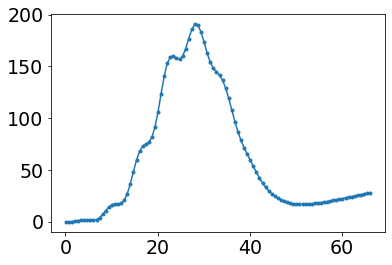

In [32]:
plt.plot(period, rolling_mean/normalization_factor, '.-')

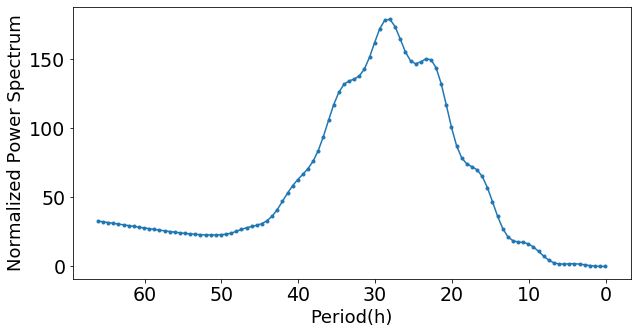

In [10]:
power_array = np.array(power)
power_mean = power_array.mean(-1)
normalization_factor = np.var(Smoothed_signal)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(period, power_mean/normalization_factor, '.-')
#plt.xscale('log', basex=10)
ax.invert_xaxis()
plt.xlabel("Period(h)", fontsize=18)
plt.ylabel("Normalized Power Spectrum", fontsize=18)
plt.show()

In [76]:

rolling_autocorr = data1["Backscatter [a.u.]"].rolling(1500).apply(lambda x: sm.tsa.acf(x, nlags=5, fft=False)[1], raw=True)
alpha = (rolling_autocorr.dropna()).mean()


In [77]:
#alpha = sm.tsa.acf(Smoothed_signal, nlags=5, fft=False)[1] # lag-1 autocorrelation of actual data 
N = len(Smoothed_signal)

In [57]:
x = []
x.append(0)
for i in range(1, N):
    x.extend(alpha * x[i-1] + np.random.normal(0, 1, size=1))
    
    
x = np.array(x)
x = x - np.mean(x)
x = x + np.mean(Smoothed_signal)
print(np.mean(x))
x = (x/np.std(x))*np.std(Smoothed_signal)
print(np.std(x))


scales = [20, 25, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 4000, 5000, 6000, 7000, 8000,
      9000, 10000]

scales = np.arange(1, 1000, 10)

dt = (0.016666666666666666)*2
[coefficients1, frequencies1] = pywt.cwt(x, scales, 'cmor', dt)

power1 = (abs(coefficients1)) ** 2
period1 = 1./frequencies1

power1 = np.array(power1)
power1 = power1.mean(-1)

-0.025957502066502457
4.3200929909894485


In [78]:
def background_spectrum(alpha, N, period):
    p_lst = []
    dt = 2*(0.016666666666666666) # 1min = 1/60 h
    time = np.arange(0, N, 2) * dt
    # k: frequency index
    for k in period:
        # power spectrum of x(n) = alpha * x(n-1) + z(n), alpha: lag-1 autocorrelation, z(n): guassian white noise
        p_k = (1 - np.power(alpha, 2))/(1 + np.power(alpha, 2) - 2 * alpha * np.cos((2*np.pi*dt/k))) 
        p_lst.append(p_k)
    return np.array(p_lst)


BPS = background_spectrum(alpha, N, period)

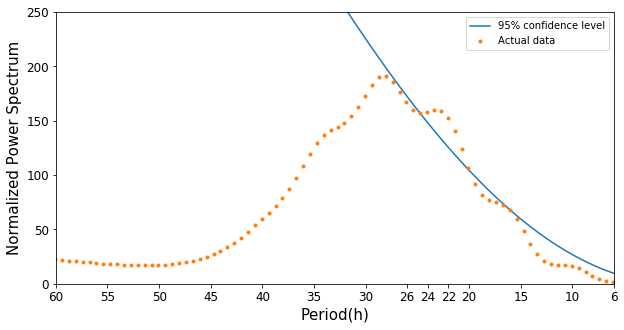

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))

_95th_percentile_value = 5.99
_99th_percentile_value = 9.21
_999th_percentile_value = 13.8

plt.plot(period, 0.5 * _95th_percentile_value * BPS)
# plt.plot(period, 0.5 * _99th_percentile_value * BPS)
# plt.plot(period, 0.5 * _999th_percentile_value * BPS)
plt.plot(period, rolling_mean/normalization_factor, '.')
# plt.plot(period, power1/normalization_factor, '.')

# plt.xscale('log', basex=10)
ax.set_xticks([6, 10, 15, 20, 22, 24, 26, 30, 35, 40, 45, 50, 55, 60])
plt.ylim(0,250)
plt.xlim(6,60)
ax.invert_xaxis()
plt.xlabel("Period(h)", fontsize=15)
plt.ylabel("Normalized Power Spectrum", fontsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.legend(['95% confidence level', 'Actual data'])
plt.show()

In [ ]:
# T = []
# logpower_lst = []
# for i in range(len(power)):
#     logpower = np.log2(np.mean(power[i]))
#     logpower_lst.append(logpower)
#     if logpower>11:
#         print(f"Period:{period[i]}, power:{np.log2(np.mean(power[i]))}")
#         T.append(period[i])
# np.mean(np.array(T))

# power_array = np.array(np.log2(power))
# print(power_array.shape)
# period_array = (np.tile(period, (power_array.shape[1],1))).T
# print(period_array.shape)

# power_array = power_array.reshape(-1, 1)
# period_array = period_array.reshape(-1, 1)

# th = np.arange(11, 12, 0.1)
# Period_lst = []
# for i in th:
#     period_t = period_array[power_array>i]
#     Period_lst.append(period_t.mean())
    
    
# test_value = (np.mean(Period_lst)-24)/(np.std(Period_lst)/np.sqrt(len(Period_lst)))
# test_value

## find Autocorrelation with different lags

Autocorrelation measures the degree of similarity between a time series and a lagged version of itself over successive time intervals

In [ ]:
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

fig = tsaplots.plot_acf(Smoothed_signal, lags=5)
plt.show()

sm.tsa.acf(Smoothed_signal, nlags=5, fft=False)

In [ ]:
# def lag1_Autocorrelation(x):
#     mean = np.mean(x)
#     n = ((x[2:]-mean)*(x[1:-1]-mean)).sum()
#     d = ((x-mean)**2).sum()
#     return n/d
# lag1_Autocorrelation(Smoothed_signal)

## plot different windows

In [ ]:
# t = np.arange(0, 1, step=1/1000.)
# m = t.size
# s = np.sin(2 * np.pi * 10.1 * t) + np.sin(2 * np.pi * 12.3 * t)
# plt.plot(t, s)

# n = 4096
# w = np.fft.rfft(s * get_window('blackmanharris', m), n=n)
# freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
# plt.plot(freqs, 20*np.log10(np.abs(w)))
# plt.ylim(-60, 60)
# plt.xlim(0, 20)

# w = np.fft.rfft(s * get_window('boxcar', m), n=n)
# freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
# plt.plot(freqs, 20*np.log10(np.abs(w)))
# plt.ylim(-60, 60)
# plt.xlim(0, 20)

## build background spectrum

In [ ]:
x = []
num_samples = 6000
alpha = 0.7
x.append(0)
for i in range(1, num_samples):
    x.extend(alpha * x[i-1] + np.random.normal(0, 1, size=1))
    
dt = (0.016666666666666666)
time = np.arange(0, 2*num_samples, 2) * dt 
plt.figure()
plt.plot(time, x)
plt.show() 


title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (hour)'
xlabel = 'Time (hour)'

red_noise = np.array(x)

scales = [20, 25, 50, 60, 70, 80, 90,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 4000, 5000, 6000, 7000, 8000,
          9000, 10000]


fig, ax = plt.subplots(figsize=(25, 10))
time, period, power_noise = plot_wavelet(ax, time, red_noise, scales, xlabel=xlabel, ylabel=ylabel, title=title)

power_noise = np.array(power_noise)
plt.figure()
plt.plot(period, power_noise.mean(-1), '.-')
plt.xlabel("Period(h)", fontsize=18)
plt.xscale('log', basex=10)
#plt.yscale('log', basey=2)
plt.ylabel("Wavelet Power Spectrum", fontsize=15)
plt.show()

In [ ]:
def generate_timeseries(alpha, num_samples, waveletname='cmor'):

    x = []
    x.append(0)
    for i in range(1, num_samples):
        x.extend(alpha * x[i-1] + np.random.normal(0, 1, size=1))

    dt = (0.016666666666666666)
    scales = [20, 25, 50, 60, 70, 80, 90,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 4000, 5000, 6000, 7000, 8000,
          9000, 10000]
    [coefficients, frequencies] = pywt.cwt(x, scales, waveletname, dt)
    
    power = (abs(coefficients)) ** 2
    period = 1./frequencies
    return np.array(power), period

In [ ]:
# power_lst = []
# for i in range(100):
#     power_noise, period = generate_timeseries(num_samples, waveletname='cmor')
#     power_lst.append(power_noise.mean(-1))
    
# fig, ax = plt.subplots(figsize=(10, 5))
# plt.plot(period, power.mean(-1), '.-')
# plt.xlabel("Period(h)", fontsize=18)
# plt.xscale('log', basex=10)
# ax.invert_xaxis()
# plt.ylabel("Wavelet Power Spectrum", fontsize=15)
# plt.show()

In [ ]:
alpha = sm.tsa.acf(Smoothed_signal, nlags=5, fft=False)[1]
N = len(Smoothed_signal)
alpha

In [ ]:
x = []
x.append(0)
for i in range(1, N):
    x.extend(alpha * x[i-1] + np.random.normal(0, 1, size=1))
    
    
x = np.array(x)
x = x - np.mean(x)
x = x + np.mean(Smoothed_signal)
print(np.mean(x))
x = (x/np.std(x))*np.std(Smoothed_signal)
print(np.std(x))


scales = [20, 25, 50, 60, 70, 80, 85, 90, 95, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 3000, 4000, 5000, 6000, 7000, 8000,
      9000, 10000]
dt = (0.016666666666666666)*2
[coefficients1, frequencies1] = pywt.cwt(x, scales, 'cmor', dt)

power1 = (abs(coefficients1)) ** 2
period1 = 1./frequencies1

power1 = np.array(power1)
power1 = power1.mean(-1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(period1, power1/normalization_factor, '.-')
plt.xlabel("Period(h)", fontsize=18)
plt.xscale('log', basex=10)
ax.invert_xaxis()
plt.ylabel("Wavelet Power Spectrum", fontsize=15)
plt.show()